This dataset presents transactions that occurred in two days by european cardholders., where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation, this is being done due to confidentiality. issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. Feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### Importing required libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import statsmodels.api as sm
from matplotlib import pylab
from pylab import *
from scipy import stats

#### Reading Dataset into Memory

In [2]:
df = pd.read_csv('/home/eduaman14892859/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
f'Shape of our dataset is {df.shape}'

'Shape of our dataset is (284807, 31)'

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Data Distribution w.r.t Target variable

0    0.998273
1    0.001727
Name: Class, dtype: float64


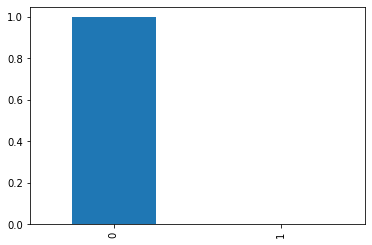

In [35]:
print(df['Class'].value_counts(normalize=True))
df['Class'].value_counts(normalize=True).plot(kind = 'bar')

- Checking Columns having any Nulls 

In [36]:
if df.isnull().any().any()==False:
    print('There are no Null records in the dataset')
else:
    null_count = df.isnull().sum()
    null_count[null_count > 0]

There are no Null records in the dataset


- As dataset is too huge and it wont fit in RAM , hence take a fraction of it to plot some graphs

In [37]:
sample_data = df.sample(frac=0.1, random_state = 1)
print(sample_data.shape)
print(sample_data['Class'].value_counts(normalize=True))

(28481, 31)
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [ ]:
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(sample_data, hue="Class")

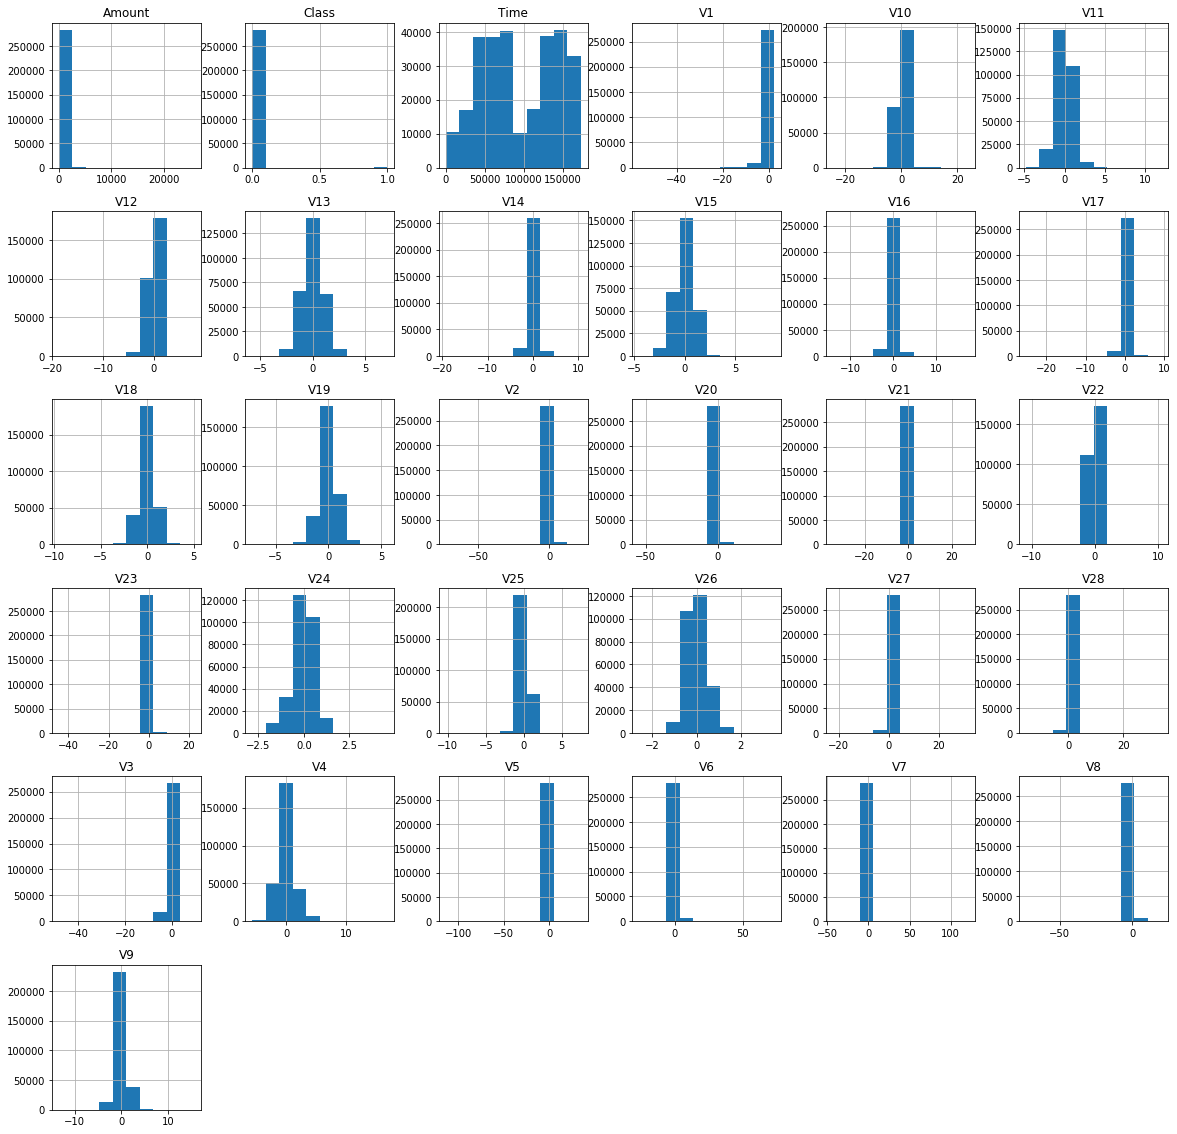

In [66]:
df.hist(figsize = (20, 20))
plt.show()

- Only 0.17% of total txns are Fraudulent , which makes the data highly imbalance

In [38]:
fraud_txn = df[df['Class'] == 1]
valid_txn = df[df['Class'] == 0]

outlier_fraction = len(fraud_txn)/float(len(valid_txn))
print(f'Percentage of Anamoly/Outlier in the data is : {outlier_fraction}')

print('Fraud Cases : {}'.format(len(df[df['Class'] == 1])))
print('Valid Cases : {}'.format(len(df[df['Class'] == 0])))

Percentage of Anamoly/Outlier in the data is : 0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


- We can clearly see its just a one day data 

In [39]:
def time_convertor(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds) 

time_convertor(df['Time'].max())

'23:59:52'

In [40]:
df['Hour'] = df['Time'].apply(lambda x : np.ceil(float(x)/3600)%24)  # Lets convert the data into Hour 
print(df['Hour'].min() , df['Hour'].max())

0.0 23.0


In [41]:
#df.drop(['Day','Day2'],inplace=True, axis=1)

Text(0.5, 1.0, 'Transaction Times')

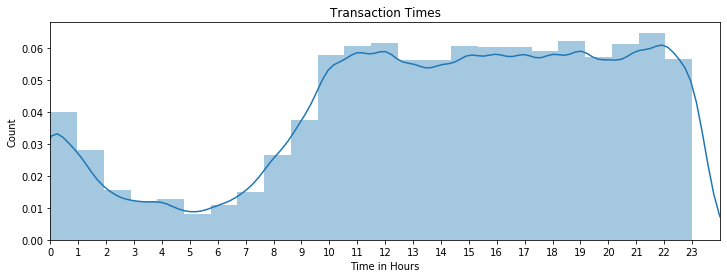

In [42]:
plt.figure(figsize=(12,4))
sns.distplot(df['Hour'], bins=24, kde=True)
plt.xlim([0,24])
plt.xticks(np.arange(0,24))
plt.xlabel('Time in Hours')
plt.ylabel('Count')
plt.title('Transaction Times')

- There is so much overlapping on time variable 
- Its not clear when most of the fradulent txns class 1 happens.

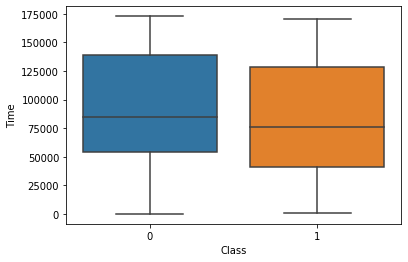

In [43]:
sns.boxplot(x = 'Class', y = 'Time', data = df)  # Overlapping data , not much difference
plt.show()

Text(0.5, 1.0, 'Distribution of Classes Hour Wise')

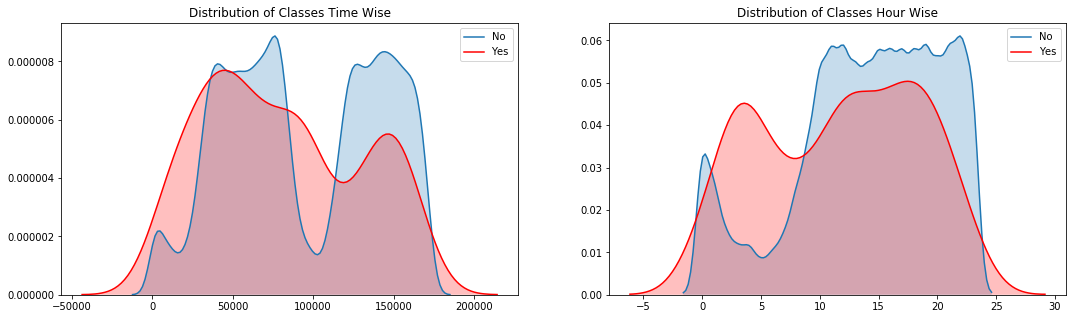

In [44]:
plt.subplots(1, 2, figsize=(18, 5))

plt.subplot(1, 2, 1)
a = sns.kdeplot(df.loc[df['Class'] == 0, 'Time'], shade=True, label='No')
b = sns.kdeplot(df.loc[df['Class'] == 1, 'Time'], color= 'red', shade=True, label='Yes')
plt.title('Distribution of Classes Time Wise')

plt.subplot(1, 2, 2)
c = sns.kdeplot(df.loc[df['Class'] == 0, 'Hour'], shade=True, label='No')
d = sns.kdeplot(df.loc[df['Class'] == 1, 'Hour'], color= 'red', shade=True, label='Yes')
plt.title('Distribution of Classes Hour Wise')

- Below graphs and observations says that most of the Fradulent txns are of small amount only < 2500 Dollars
- But that doesn't mean that all Valid transactions are above 2500 Dollars

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


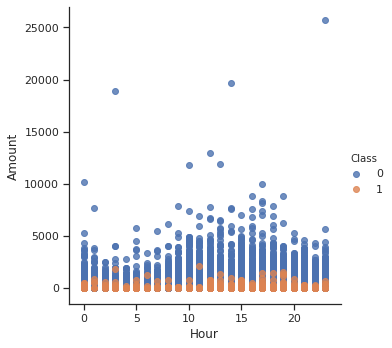

In [45]:
sns.set(style="ticks")
sns.lmplot("Hour", "Amount", data=df, hue='Class', fit_reg=False,  size=5, aspect=1)

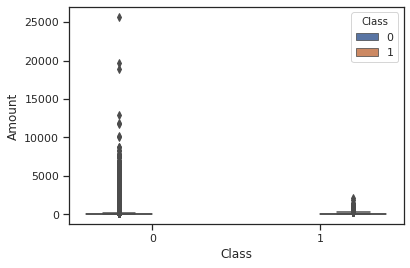

In [46]:
sns.boxplot(x="Class", y = "Amount", data= df, hue = "Class")

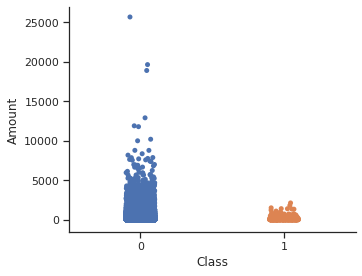

In [47]:
sns.catplot(data=df, x='Class', y='Amount', hue='Class' , height=4, aspect=13/10)

- Let's see in which percentile, most of the data lies

In [48]:
txn_amt_less_2500 = df[df['Amount']< 2500]
percentage = len(txn_amt_less_2500)/df.shape[0]
print(f'There are {len(txn_amt_less_2500)} transactions which has Transaction amount less than 2500')
print(f'Also, this contributes {percentage*100} in our total data')
print(txn_amt_less_2500['Class'].value_counts())

There are 284358 transactions which has Transaction amount less than 2500
Also, this contributes 99.84234938045763 in our total data
0    283866
1       492
Name: Class, dtype: int64


- We can clearly see most of the Amount data lies in 100% percentile 
- Uneven distribution of data among different percentiles makes is highly Skewed distribution too

In [49]:
#df['Amount'].describe(percentiles=[0.1, 0.2, 0.3, 0.5])
#np.percentile(df['Amount'],50) 
df['Amount'].describe(percentiles=[0.5, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099,  1.])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0.91%         0.020000
0.92%         0.020000
0.93%         0.050000
0.94%         0.050000
0.95%         0.080000
0.96%         0.100000
0.97%         0.110000
0.98%         0.120000
0.99%         0.120000
50%          22.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

- Amount variable is Highly Right Skewed.
- We need to make it back to the normal guassian curve otherwise it will mess up with our model prediction.
- It affects the regression intercept and the coefficients associated with the model.
- We can simply take the log and it will get it back into the shape
- We can also try Box-Cox transformation which calculates the best power transformation and reduces skewness although a simpler approach by applying the natural logarithm. 
- Box-Cox can only be applied to strictly positive data. The transformation is parameterized and determined through maximum likelihood estimation. 

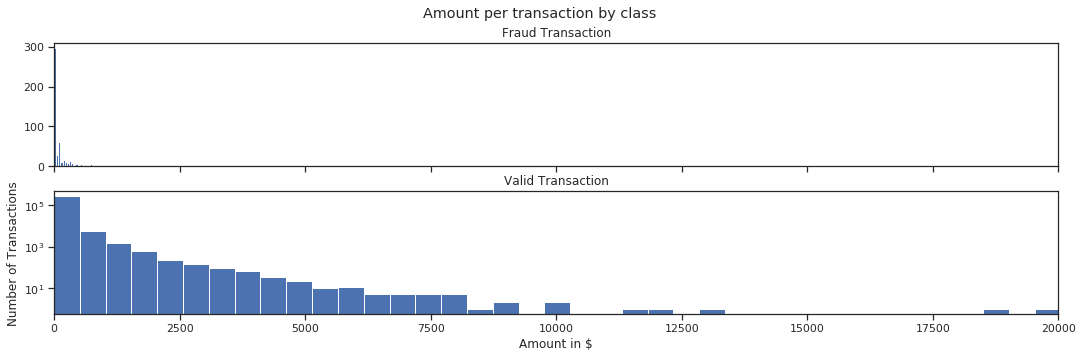

In [50]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18, 5))
f.suptitle('Amount per transaction by class')

ax1.hist(fraud_txn['Amount'], bins = 50)
ax1.set_title('Fraud Transaction')

ax2.hist(valid_txn['Amount'], bins = 50)
ax2.set_title('Valid Transaction')

plt.xlabel('Amount in $')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [51]:
print('Original Average skewness value is %2.2f' %(np.mean(abs(df['Amount'].skew()))))
#print('Original Average skewness value is : {}'.format(np.mean(abs(df['Amount'].skew()))))

Original Average skewness value is 16.98


###### Box Cox Transformation 
- Data must be positive to apply Box Cox.
- So we will check if there are any records in negative or 0.
- Then we simply add some small value to it, this is called shifting
- It takes 3 args and returns 3:
a. Box-Cox power transformed array which are our new values for the variable 
b. If the second returned argument lambda is None, then it returns maximum log-likelihood value in the Box Cox Transform.
c. If alpha is not None, it returned tuple of floats that represents the minimum and maximum confidence limits given alpha. 
- In our case we are taking 0.01 alpha i.e 100 * (1-alpha)% = Tuple that 99% confidence interval for lambda.

In [7]:
print('Amount of negative or Zeros present in variable is : {}'.format(len(df[df['Amount']==0])))

Amount of negative or Zeros present in variable is : 1825


In [8]:
df.loc[:,'Amount'] = df['Amount'] + 1e-9

In [9]:
df.loc[:,'Amount'], MLE_Value, (Min_CI, Max_CI) = stats.boxcox(df['Amount'], alpha=0.01)

print(f'Our MLE for Lambda in this transformation is : {MLE_Value}')
print(f'Also, the range of  99% CI values are : {Min_CI, Max_CI}')

Our MLE for Lambda in this transformation is : 0.13392240552999146
Also, the range of  99% CI values are : (0.132621597858576, 0.13523057944346129)


Text(0.5, 1.0, 'Box Cox Transformation')

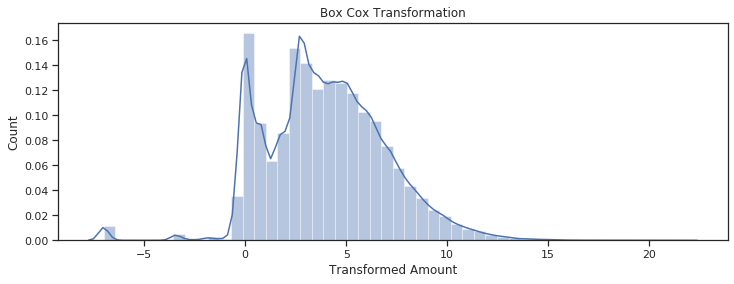

In [55]:
plt.figure(figsize=(12,4))
sns.distplot(df['Amount'], kde=True)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Box Cox Transformation')

In [5]:
print('Transformed Average skewness value is %2.2f' %(np.mean(abs(df['Amount'].skew()))))

Transformed Average skewness value is 16.98


In [6]:
#df['Amount'].describe(percentiles=[0.1,0.25,0.5,0.75,1])
df['Amount'].describe(percentiles=[0.5, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099,  1.])

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
0.91%         0.020000
0.92%         0.020000
0.93%         0.050000
0.94%         0.050000
0.95%         0.080000
0.96%         0.100000
0.97%         0.110000
0.98%         0.120000
0.99%         0.120000
50%          22.000000
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

- After transformation , we can clearly see distribution has become normal 
- Also, we can see in early hours of the day between 5am to 10am , histogram of amount goes up
- May be people are going for office , buying breakfast, hiring cabs, filling at gas station and started paying money

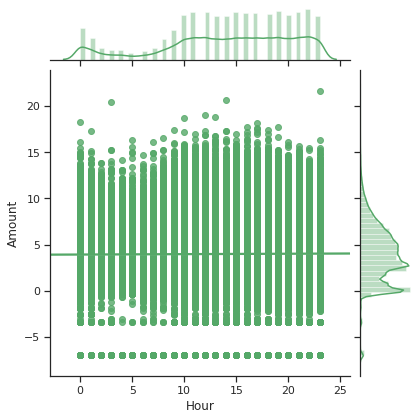

In [58]:
sns.jointplot(data=df, x='Hour', y='Amount', kind='reg', color='g')   # With reg we indicate that we want a regression fit to the data.
plt.show()

- Compare the mean and std dev in Amount Variable for both the classes
- Looks roughly same

In [59]:
print(fraud_txn['Amount'].describe()[['mean','std']])
print(valid_txn['Amount'].describe()[['mean','std']])

mean    122.211321
std     256.683288
Name: Amount, dtype: float64
mean     88.291022
std     250.105092
Name: Amount, dtype: float64


- Similarly, we will plot and similar important measures to see tendency of the data 

### Dealing with Variables starts with V

In [60]:
v_columns = [i for i in df.columns if i.startswith('V')]

In [61]:
df[v_columns].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


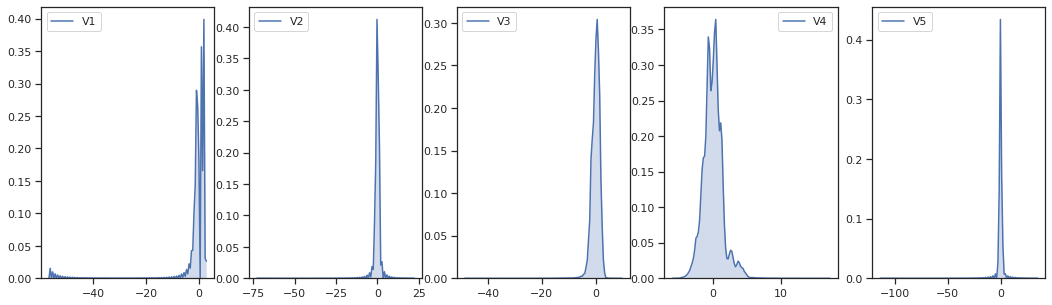

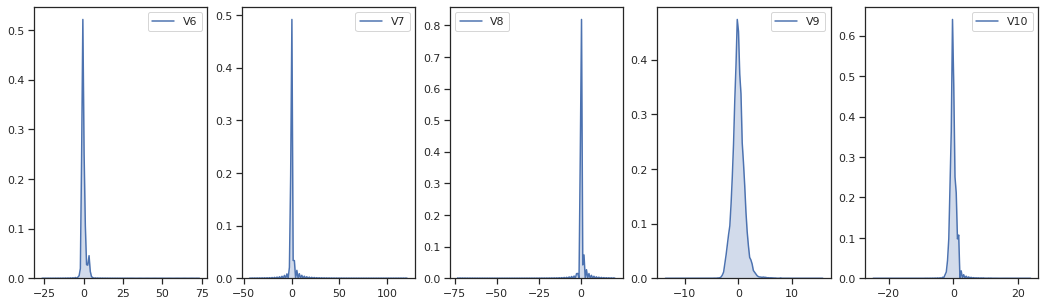

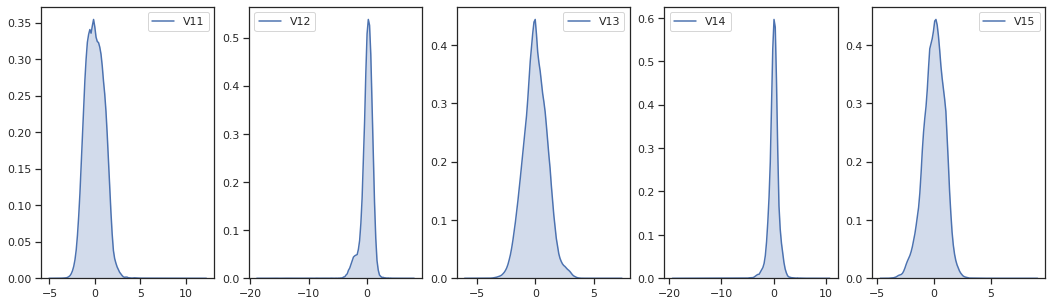

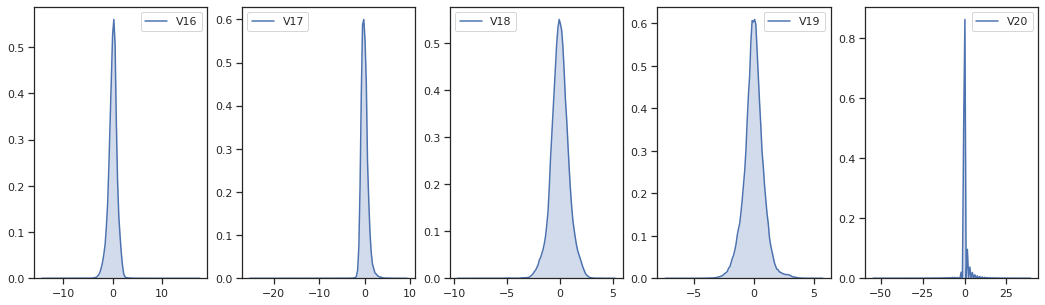

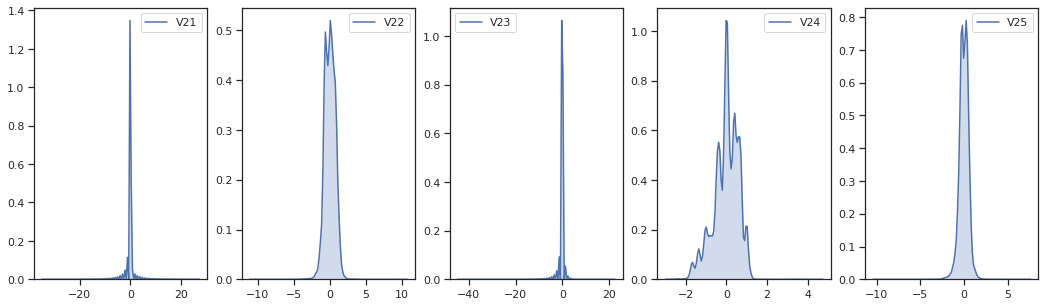

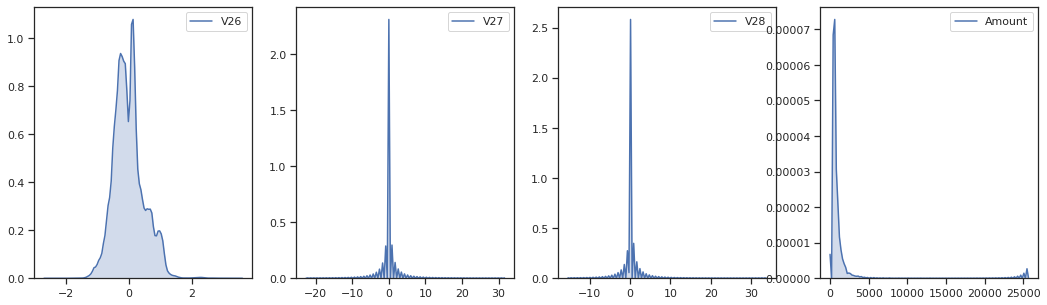

In [29]:
fig, ax =plt.subplots(1,5)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V1'], ax=ax[0],shade=True)
sns.kdeplot(df['V2'], ax=ax[1],shade=True)
sns.kdeplot(df['V3'], ax=ax[2],shade=True)
sns.kdeplot(df['V4'], ax=ax[3],shade=True)
sns.kdeplot(df['V5'], ax=ax[4],shade=True)
fig.show()

fig, ax =plt.subplots(1,5)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V6'], ax=ax[0],shade=True)
sns.kdeplot(df['V7'], ax=ax[1],shade=True)
sns.kdeplot(df['V8'], ax=ax[2],shade=True)
sns.kdeplot(df['V9'], ax=ax[3],shade=True)
sns.kdeplot(df['V10'], ax=ax[4],shade=True)
fig.show()

fig, ax =plt.subplots(1,5)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V11'], ax=ax[0],shade=True)
sns.kdeplot(df['V12'], ax=ax[1],shade=True)
sns.kdeplot(df['V13'], ax=ax[2],shade=True)
sns.kdeplot(df['V14'], ax=ax[3],shade=True)
sns.kdeplot(df['V15'], ax=ax[4],shade=True)
fig.show()

fig, ax =plt.subplots(1,5)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V16'], ax=ax[0],shade=True)
sns.kdeplot(df['V17'], ax=ax[1],shade=True)
sns.kdeplot(df['V18'], ax=ax[2],shade=True)
sns.kdeplot(df['V19'], ax=ax[3],shade=True)
sns.kdeplot(df['V20'], ax=ax[4],shade=True)
fig.show()

fig, ax =plt.subplots(1,5)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V21'], ax=ax[0],shade=True)
sns.kdeplot(df['V22'], ax=ax[1],shade=True)
sns.kdeplot(df['V23'], ax=ax[2],shade=True)
sns.kdeplot(df['V24'], ax=ax[3],shade=True)
sns.kdeplot(df['V25'], ax=ax[4],shade=True)
fig.show()

fig, ax =plt.subplots(1,4)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V26'], ax=ax[0],shade=True)
sns.kdeplot(df['V27'], ax=ax[1],shade=True)
sns.kdeplot(df['V28'], ax=ax[2],shade=True)
sns.kdeplot(df['Amount'], ax=ax[3],shade=True)
fig.show()

### Plot Central Limit Tendency for these Variables

Text(0, 0.5, 'Mean')

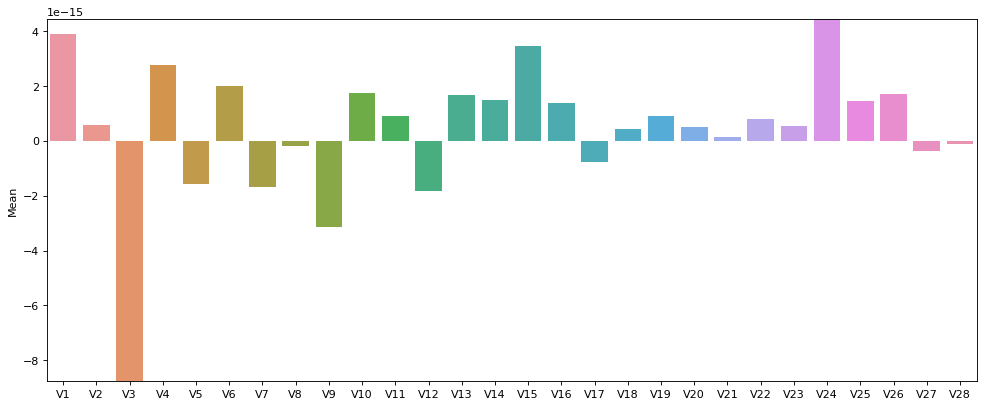

In [22]:
plt.figure(figsize=(15,6), dpi=80)
sns.barplot(x=v_columns, y=df[v_columns].mean())
plt.ylabel('Mean')

Text(0, 0.5, 'Standard Deviation')

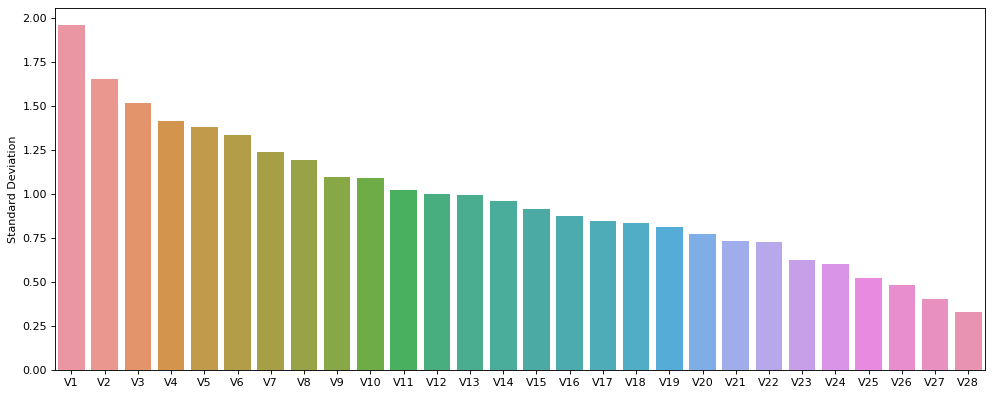

In [25]:
plt.figure(figsize=(15,6), dpi=80)
sns.barplot(x=v_columns, y=df[v_columns].std())
plt.ylabel('Standard Deviation')

- Skewness -  Some Variables are highly skewed , they definately cause long tails and contains lots of Outliers

Text(0, 0.5, 'Skewness')

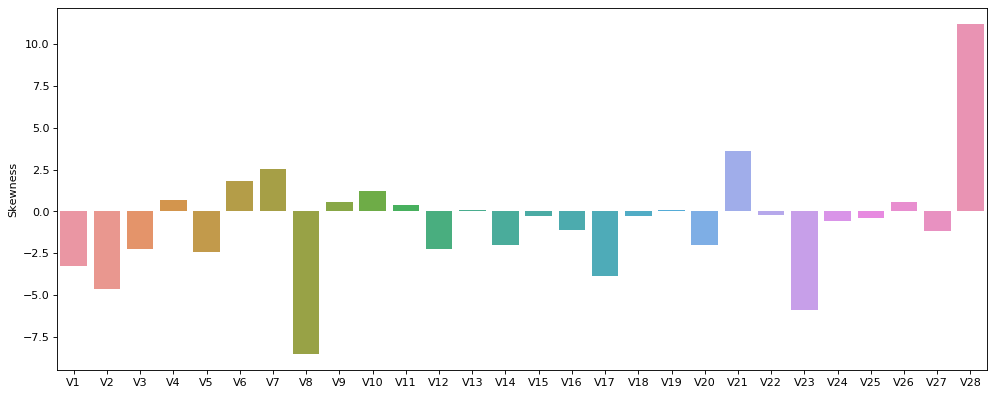

In [26]:
plt.figure(figsize=(15,6), dpi=80)
sns.barplot(x=v_columns, y=df[v_columns].skew())
plt.ylabel('Skewness')

- Lets take 2 varibles and see how actually Skewness looks like

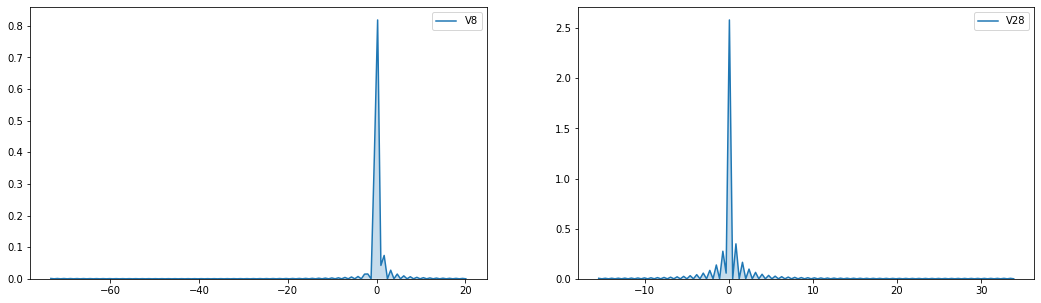

In [33]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V8'], ax=ax[0],shade=True)
sns.kdeplot(df['V28'], ax=ax[1],shade=True)

### Plotting some Highly Skewed Variables to find Outliers

Text(0.5, 1.0, 'Log Data - with outliers')

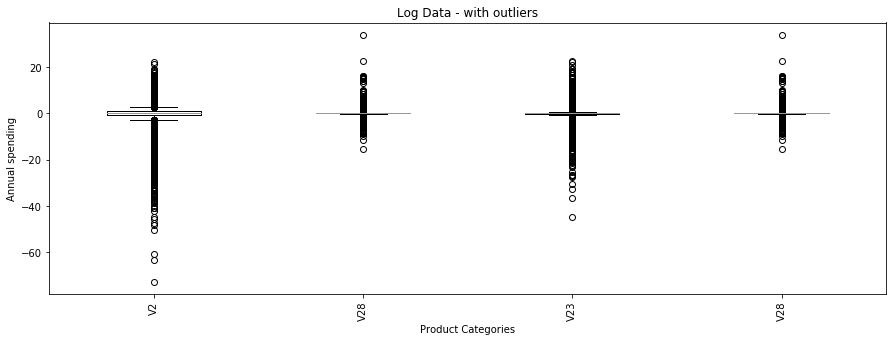

In [34]:
box_plot_feat = ['V2','V28','V23','V28']

fig, ax = plt.subplots(figsize=(15,5))
features = df[box_plot_feat].values
ax.boxplot(df[box_plot_feat].values)
ax.set_xticklabels(box_plot_feat, rotation = 90)
ax.set_ylabel("Annual spending")
ax.set_xlabel("Product Categories")
ax.set_title("Log Data - with outliers")

Text(0, 0.5, 'Kurtosis')

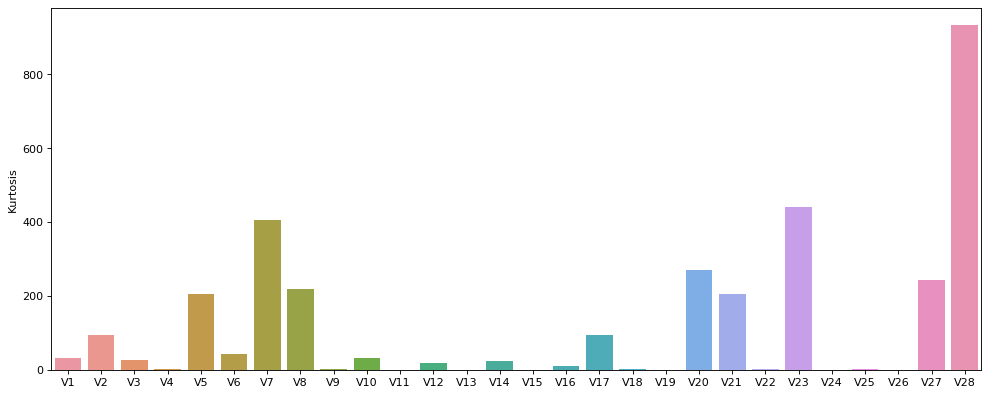

In [28]:
plt.figure(figsize=(15,6), dpi=80)
sns.barplot(x=v_columns, y=df[v_columns].kurtosis())
plt.ylabel('Kurtosis')

- Similary lets plot Kurtosis of some variables and see how point their peaks are.

- Variables which has kurtosis closer to 0 tend to have Normal Guassian Distribution

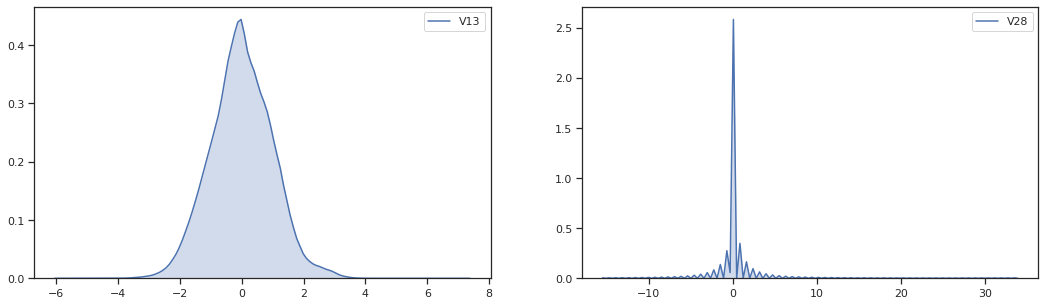

In [62]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18, 5)
sns.kdeplot(df['V13'], ax=ax[0],shade=True)
sns.kdeplot(df['V28'], ax=ax[1],shade=True)

In [10]:
df_copy = df.copy()   # Creating copy of the dataframe , so that it can be reused later if needed

In [11]:
for col in df_copy.columns:
    print(f'Amount of negative or Zeros present in variable {col} is : {len(df[df[col]==0])}')

Amount of negative or Zeros present in variable Time is : 2
Amount of negative or Zeros present in variable V1 is : 0
Amount of negative or Zeros present in variable V2 is : 0
Amount of negative or Zeros present in variable V3 is : 0
Amount of negative or Zeros present in variable V4 is : 0
Amount of negative or Zeros present in variable V5 is : 0
Amount of negative or Zeros present in variable V6 is : 0
Amount of negative or Zeros present in variable V7 is : 0
Amount of negative or Zeros present in variable V8 is : 0
Amount of negative or Zeros present in variable V9 is : 0
Amount of negative or Zeros present in variable V10 is : 0
Amount of negative or Zeros present in variable V11 is : 0
Amount of negative or Zeros present in variable V12 is : 0
Amount of negative or Zeros present in variable V13 is : 0
Amount of negative or Zeros present in variable V14 is : 0
Amount of negative or Zeros present in variable V15 is : 0
Amount of negative or Zeros present in variable V16 is : 0
Amoun

- As time doesn't play an important role , let's drop it 

In [12]:
df_copy.drop('Time',axis=1,inplace=True)

### Splitting Independent and Dependent Variables

In [13]:
df_x = df_copy.drop('Class',axis=1)
df_y = df_copy['Class']

### Data Standardisation 
- To bring variables mean closer to 0 and std dev to 1

In [14]:
from sklearn.preprocessing import StandardScaler

standardised = StandardScaler()
scaled_data = standardised.fit_transform(df_x)

df_x = pd.DataFrame(scaled_data, index = df_x.index, columns = df_x.columns)
df_x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,1.066122
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.985704
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.718934
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.941062
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,0.589178


### Feature Selection
- Removing features with low variance- features that have the same value/info in all samples

In [17]:
from sklearn.feature_selection import VarianceThreshold

threshold_n=0.80
best_features_VT = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
best_features_VT_var = best_features_VT.fit_transform(df_x)
best_features_VT = df_x[df_x.columns[best_features_VT.get_support(indices=True)]] 

print(f'Shape of new dataset after extracting important features is  : {best_features_VT.shape}')
print(f'Shape of old dataset was :                                     {df_x.shape}')

Shape of new dataset after extracting important features is  : (284807, 29)
Shape of old dataset was :                                     (284807, 29)


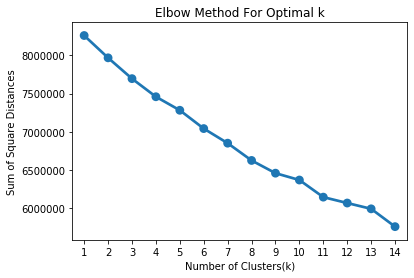

In [18]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(df_x)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Shape of new dataset after extracting important features is  : (284807, 10)
Shape of old dataset was :                                     (284807, 29) 
 



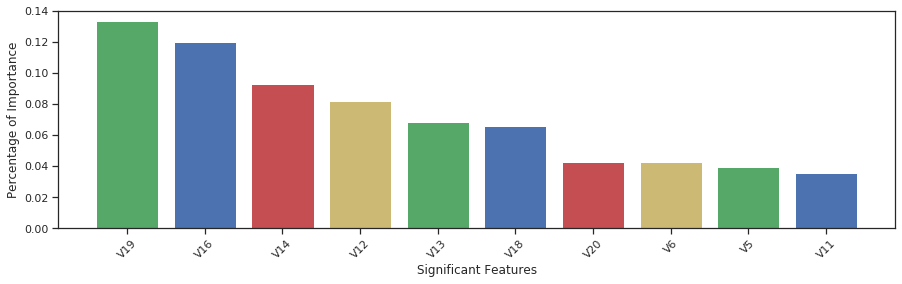

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

classifier = ExtraTreesClassifier().fit(df_x, df['Class'])
best_features = SelectFromModel(classifier, prefit=True)
X_Data_new = best_features.transform(df_x)
print(f'Shape of new dataset after extracting important features is  : {X_Data_new.shape}')
print(f'Shape of old dataset was :                                     {df_x.shape} \n \n')


features = X_Data_new.shape[1]
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

feature_imp = {}
for i in range(features):
    #print(df.columns[2+indices[i]], importances[indices[i]])
    column_name   = df_x.columns[2+indices[i]]
    feature_value = importances[indices[i]]
    feature_imp[column_name] = feature_value


plt.figure(figsize=(15,4))
plt.bar(list(feature_imp.keys()), feature_imp.values(), color='gbry')
plt.ylabel ('Percentage of Importance')
plt.xlabel ('Significant Features')
plt.xticks(rotation=45)
plt.show()

### Mutual Information
- It's a non-parametric method to find the mutual dependence between two variables (Independent and Dependent).
- Mutual information of 0 indicates no dependence, and higher values indicate higher dependence.
- It captures any kind of statistical dependency, but being nonparametric, it require more samples for accurate estimation.
- For Regression problems, we use mutual_info_regression.

In [34]:
from sklearn.feature_selection import mutual_info_classif as MIC

best_features_MIC = pd.Series(data = MIC(df_x, df_y , discrete_features=False, random_state=1),\
                              index = df_x.columns)

In [37]:
best_features_MIC.sort_values(ascending=False)

V17       0.008258
V14       0.008136
V12       0.007601
V10       0.007530
V11       0.006831
V16       0.006144
V4        0.004976
V3        0.004954
V18       0.004317
V9        0.004277
V7        0.003951
V2        0.003228
V21       0.002452
V27       0.002444
V5        0.002391
V6        0.002388
V1        0.002127
Time      0.001928
V8        0.001898
V28       0.001871
V19       0.001472
Amount    0.001441
V20       0.001207
V23       0.000762
V24       0.000642
V26       0.000500
V25       0.000500
V13       0.000408
V22       0.000353
V15       0.000315
dtype: float64

Performing Statistical Tests to see which V variables are actually important 

In [70]:
from statsmodels.stats import weightstats as stests

significant_columns_categ=[]
non_significant_columns_categ = []

for col in df[v_columns]:
    valid=df[col][df['Class']==0]
    fraud=df[col][df['Class']==1]
    t_stat, p_value = stests.ztest(valid,fraud)
    
    if p_value < 0.05: 
        significant_columns_categ.append({'Variable':col,'p_value':p_value, 'Comment': 'Reject Null Hypothesis, Dependent & Significant Column must be taken, Falls in critical region'})
    elif p_value > 0.05: 
        non_significant_columns_categ.append({'Variable':col,'p_value':p_value, 'Comment': 'Fail to reject Null Hypothesis, Independent & Non Significant Column AVOID them'})

sig_df=pd.DataFrame(significant_columns_categ).sort_values(by='p_value',ascending=False) 
non_sig_df=pd.DataFrame(non_significant_columns_categ) 

sig_df = sig_df.sort_values('p_value', ascending=False)
sig_df.head()

,Variable,p_value,Comment
14,V15,2.420067e-02,"Reject Null Hypothesis, Dependent & Significan..."
22,V26,1.741905e-02,"Reject Null Hypothesis, Dependent & Significan..."
12,V13,1.473673e-02,"Reject Null Hypothesis, Dependent & Significan..."
21,V24,1.163505e-04,"Reject Null Hypothesis, Dependent & Significan..."
24,V28,3.593076e-07,"Reject Null Hypothesis, Dependent & Significan..."


In [71]:
non_sig_df

,Variable,p_value,Comment
0,V22,0.667359,"Fail to reject Null Hypothesis, Independent & ..."
1,V23,0.151859,"Fail to reject Null Hypothesis, Independent & ..."
2,V25,0.077524,"Fail to reject Null Hypothesis, Independent & ..."


### Let's find out Important Variables from all the techniques we have used

In [73]:
print(f'From SelectFromModel, Important Variables are : {feature_imp.keys()} \n')
print('From Statistical Test, Important Variables are : ') 
print(sig_df['Variable'].values)
print('\n')
print('Columns that need to be dropped as they are Independent and Not statistically Significant : ')
print(non_sig_df['Variable'].values)

From SelectFromModel, Important Variables are : dict_keys(['V19', 'V16', 'V14', 'V12', 'V13', 'V18', 'V20', 'V6', 'V5', 'V11']) 

From Statistical Test, Important Variables are : 
['V15' 'V26' 'V13' 'V24' 'V28' 'V27' 'V8' 'V20' 'V19' 'V21' 'V6' 'V9'
 'V14' 'V10' 'V11' 'V12' 'V2' 'V3' 'V5' 'V7' 'V16' 'V18' 'V4' 'V17' 'V1']


Columns that need to be dropped as they are Independent and Not statistically Significant : 
['V22' 'V23' 'V25']


#### TSNE - t-distributed stochastic neighbor embedding
- Unsupervised, non-linear technique used for data exploration and visualizing high-dimensional data. 
- In simpler terms, t-SNE gives us a feel or intuition of how the data is arranged in a high-dimensional space.

In [8]:
sample_data = df.sample(frac=0.1, random_state = 1)
v_columns = [i for i in sample_data.columns if i.startswith('V')]

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


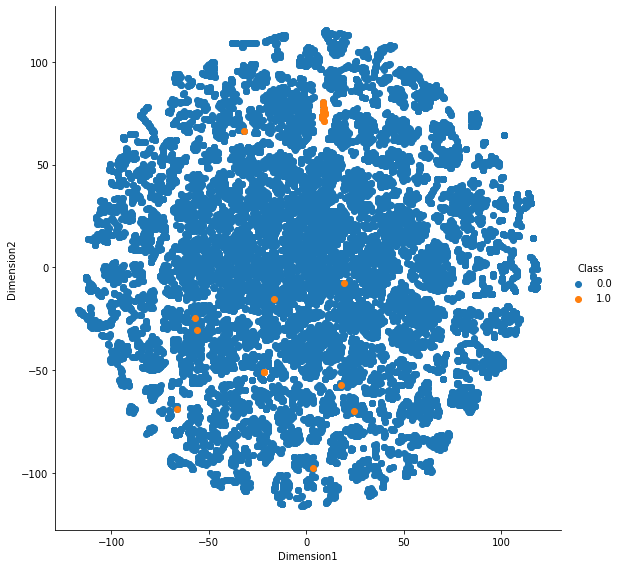

In [9]:
from sklearn.manifold import TSNE

x_data = sample_data[v_columns]
y_data = sample_data['Class']

model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1200)

tsne_data = model.fit_transform(x_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_data)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

#### TSNE with Limited Variables

In [92]:
df_x = df_copy.drop('Class',axis=1)
df_y = df_copy['Class']

(28481, 10) (28481,)


/usr/local/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


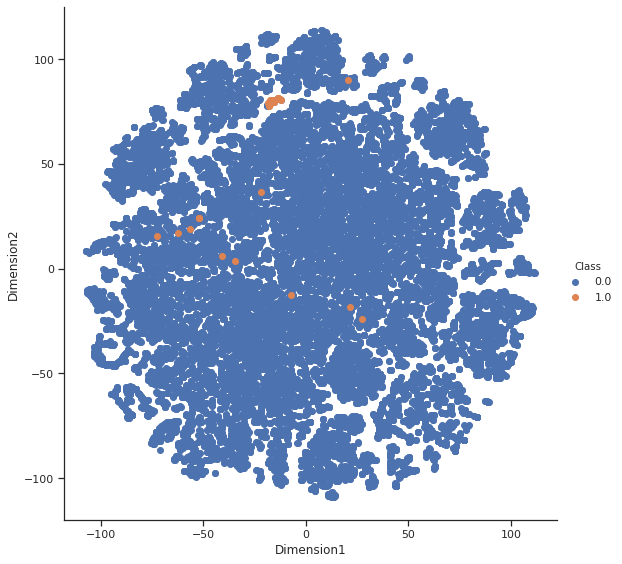

In [93]:
x_data = df_x[['V19', 'V16', 'V14', 'V12', 'V13', 'V18', 'V20', 'V6', 'V5', 'V11']]
x_data = x_data.sample(frac=0.1, random_state = 1)

y_data = df_y.sample(frac=0.1, random_state = 1)

print(x_data.shape , y_data.shape)

model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1200)

tsne_data = model.fit_transform(x_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y_data)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

## Train Test Splitting the Data 
- Use Random Search CV to find the best Hyperparameter
- Not use GridSearch, as its too much memory consuming
- First with all the variables
- Then with Best Features generated from SelectFromModel

In [24]:
from sklearn.model_selection import train_test_split
from datetime import datetime
import time
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20, random_state = 1001)

print(f'Shape of our train dataset is {X_train.shape} and {y_train.shape} ')
print(f'Shape of our test dataset is  {X_test.shape} and  {y_test.shape} ')

Shape of our train dataset is (227845, 31) and (227845,) 
Shape of our test dataset is  (56962, 31) and  (56962,) 


### XGBoost Classifier 
- With all variables

In [13]:
clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 10,
              'eval_set': [(X_test, y_test)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=-1, verbose=2, cv=2,
                            scoring='roc_auc', refit=True, random_state=42)

print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")

for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   55.4s remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.3min finished


[09:07:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 4 pruned nodes, max_depth=7
[09:07:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 6 pruned nodes, max_depth=7
[09:07:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 8 pruned nodes, max_depth=7
[09:07:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[09:07:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 6 pruned nodes, max_depth=3
[09:07:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 12 pruned nodes, max_depth=5
[09:07:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 14 pruned nodes, max_depth=9
[09:07:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 6 pruned nodes, max_depth=6
[09:07:44] /wor

[09:08:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 54 pruned nodes, max_depth=7
[09:08:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 38 pruned nodes, max_depth=7
[09:08:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 36 pruned nodes, max_depth=9
[09:08:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 52 pruned nodes, max_depth=7
[09:08:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 38 pruned nodes, max_depth=13
[09:08:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 70 pruned nodes, max_depth=7
[09:08:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 58 pruned nodes, max_depth=10
[09:08:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 62 pruned nodes, max_depth=11
[09:0

In [29]:
XGBClassifier = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bytree=0.6, gamma=0.5, learning_rate=0.2,
              max_delta_step=0, max_depth=15, min_child_weight=0.5,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

XGBClassifier.fit(X_train, y_train)

y_pred = XGBClassifier.predict(X_test)

y_score = XGBClassifier.predict_proba(X_test)[:,1]  # Only if y_test.nunique() <=2

print(f'ROC_AUC Score is : {roc_auc_score(y_test, y_score)*100}')
print(f'Accuracy is      : {XGBClassifier.score(X_test, y_test)*100}')
print(f'Average Percision Score is : {average_precision_score(y_test, y_score)*100}')
print(f'Cohen Kappa Score is : {cohen_kappa_score(y_test, y_pred)*100}')

ROC_AUC Score is : 98.86410596841698
Accuracy is      : 99.95962220427653
Average Percision Score is : 87.48854469906753
Cohen Kappa Score is : 86.98557484750249


In [28]:
XGB_cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', XGB_cm)
print('Summary Scores are : \n')
Accuracy_XGB = ((XGB_cm[0][0] + XGB_cm[1][1]) / XGB_cm.sum()) *100
print("Accuracy_XGB    : ", Accuracy_XGB)

Error_rate_XGB = ((XGB_cm[0][1] + XGB_cm[1][0]) / XGB_cm.sum()) *100
print("Error_rate_XGB  : ", Error_rate_XGB)

# True Fraud Rate
Specificity_XGB = (XGB_cm[1][1] / (XGB_cm[1][1] + XGB_cm[0][1])) *100
print("Specificity_XGB : ", Specificity_XGB)

# True Genuine Rate
Sensitivity_XGB = (XGB_cm[0][0] / (XGB_cm[0][0] + XGB_cm[1][0])) *100
print("Sensitivity_XGB : ", Sensitivity_XGB)

Confusion Matrix : 
 [[56862     4]
 [   19    77]]
Summary Scores are : 

Accuracy_XGB    :  99.95962220427653
Error_rate_XGB  :  0.04037779572346476
Specificity_XGB :  95.06172839506173
Sensitivity_XGB :  99.96659693043371


### XGBoost Classifier 
- With Best variables from SelectFromModel

In [94]:
df_x_sel = df_x[['V19', 'V16', 'V14', 'V12', 'V13', 'V18', 'V20', 'V6', 'V5', 'V11']]
df_y_sel = df_y

print(df_x_sel.shape, df_y_sel.shape)

(284807, 10) (284807,)


In [95]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(df_x_sel, df_y_sel, test_size = 0.20, random_state = 1001)

print(f'Shape of our train dataset is {X_train_sel.shape} and {y_train_sel.shape} ')
print(f'Shape of our test dataset is  {X_test_sel.shape} and  {y_test_sel.shape} ')

Shape of our train dataset is (227845, 10) and (227845,) 
Shape of our test dataset is  (56962, 10) and  (56962,) 


In [96]:
XGBClassifier_sel = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bytree=0.6, gamma=0.5, learning_rate=0.2,
              max_delta_step=0, max_depth=15, min_child_weight=0.5,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

XGBClassifier_sel.fit(X_train_sel, y_train_sel)

y_pred_sel = XGBClassifier_sel.predict(X_test_sel)

y_score_sel = XGBClassifier_sel.predict_proba(X_test_sel)[:,1]  # Only if y_test.nunique() <=2

print(f'ROC_AUC Score is : {roc_auc_score(y_test_sel, y_score_sel)*100}')
print(f'Accuracy is      : {XGBClassifier_sel.score(X_test_sel, y_test_sel)*100}')
print(f'Average Percision Score is : {average_precision_score(y_test_sel, y_score_sel)*100}')
print(f'Cohen Kappa Score is : {cohen_kappa_score(y_test_sel, y_pred_sel)*100}')

print('****'*15)

XGB_cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
print('Confusion Matrix : \n', XGB_cm_sel)
print('Summary Scores are : \n')
Accuracy_XGB = ((XGB_cm_sel[0][0] + XGB_cm_sel[1][1]) / XGB_cm_sel.sum()) *100
print("Accuracy_XGB    : ", Accuracy_XGB)

Error_rate_XGB = ((XGB_cm_sel[0][1] + XGB_cm_sel[1][0]) / XGB_cm_sel.sum()) *100
print("Error_rate_XGB  : ", Error_rate_XGB)

# True Fraud Rate
Specificity_XGB = (XGB_cm_sel[1][1] / (XGB_cm_sel[1][1] + XGB_cm_sel[0][1])) *100
print("Specificity_XGB : ", Specificity_XGB)

# True Genuine Rate
Sensitivity_XGB = (XGB_cm_sel[0][0] / (XGB_cm_sel[0][0] + XGB_cm_sel[1][0])) *100
print("Sensitivity_XGB : ", Sensitivity_XGB)

ROC_AUC Score is : 98.23246755530545
Accuracy is      : 99.95435553526913
Average Percision Score is : 84.42402420982324
Cohen Kappa Score is : 85.20460437772329
************************************************************
Confusion Matrix : 
 [[56861     5]
 [   21    75]]
Summary Scores are : 

Accuracy_XGB    :  99.95435553526913
Error_rate_XGB  :  0.04564446473087321
Specificity_XGB :  93.75
Sensitivity_XGB :  99.96308146689638


## SMOTE
- Balancing Class Labels

In [97]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20, random_state = 1001)

print(f'Shape of our train dataset is {X_train.shape} and {y_train.shape} ')
print(f'Shape of our test dataset is  {X_test.shape} and  {y_test.shape} ')

Shape of our train dataset is (227845, 31) and (227845,) 
Shape of our test dataset is  (56962, 31) and  (56962,) 


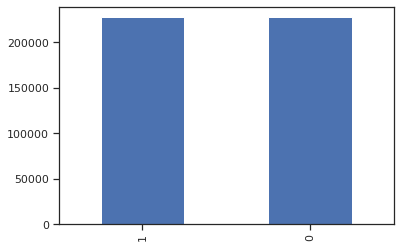

In [105]:
sm = SMOTE(random_state = 33)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

pd.Series(y_train_smote).value_counts().plot.bar()

In [107]:
XGBClassifier_smote = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
              colsample_bytree=0.6, gamma=0.5, learning_rate=0.2,
              max_delta_step=0, max_depth=15, min_child_weight=0.5,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=True,
              subsample=0.9)

XGBClassifier_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = XGBClassifier_smote.predict(X_test)

y_score_smote = XGBClassifier_smote.predict_proba(X_test)[:,1]  # Only if y_test.nunique() <=2

print(f'ROC_AUC Score is : {roc_auc_score(y_test, y_score_smote)*100}')
print(f'Accuracy is      : {XGBClassifier_smote.score(X_test, y_test)*100}')
print(f'Average Percision Score is : {average_precision_score(y_test, y_score_smote)*100}')
print(f'Cohen Kappa Score is : {cohen_kappa_score(y_test, y_pred_smote)*100}')

print('****'*15)

XGB_cm_smote = confusion_matrix(y_test, y_pred_smote)
print('Confusion Matrix : \n', XGB_cm_smote)
print('Summary Scores are : \n')
Accuracy_XGB = ((XGB_cm_smote[0][0] + XGB_cm_smote[1][1]) / XGB_cm_smote.sum()) *100
print("Accuracy_XGB    : ", Accuracy_XGB)

Error_rate_XGB = ((XGB_cm_smote[0][1] + XGB_cm_smote[1][0]) / XGB_cm_smote.sum()) *100
print("Error_rate_XGB  : ", Error_rate_XGB)

# True Fraud Rate
Specificity_XGB = (XGB_cm_smote[1][1] / (XGB_cm_smote[1][1] + XGB_cm_smote[0][1])) *100
print("Specificity_XGB : ", Specificity_XGB)

# True Genuine Rate
Sensitivity_XGB = (XGB_cm_smote[0][0] / (XGB_cm_smote[0][0] + XGB_cm_smote[1][0])) *100
print("Sensitivity_XGB : ", Sensitivity_XGB)

ROC_AUC Score is : 99.3452260577498
Accuracy is      : 99.94908886626172
Average Percision Score is : 87.91107820236151
Cohen Kappa Score is : 84.9485951853305
************************************************************
Confusion Matrix : 
 [[56851    15]
 [   14    82]]
Summary Scores are : 

Accuracy_XGB    :  99.94908886626172
Error_rate_XGB  :  0.050911133738281655
Specificity_XGB :  84.5360824742268
Sensitivity_XGB :  99.9753802866438


## Unsupervised Outlier Detection

- I will use the following 3 Techniques to find Outliers in the data. 

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor.  It comes from KNN Family and for a given point it calculates the degree of it being an Outlier, based on Euclidean distance between the point and its NN. Lower density samples are considered as outliers.

**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting 
a split value between the maximum and minimum values of the selected feature. It keeps on creating the partition until it isolated the point.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to 
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Decision function tells us the isolation score, lower the score , more normal the data point is.

**One Class SVM Algorithm**

Instead of using a hyperplane to separate two classes, it uses a hypersphere to encompass all of the instances.
The core idea is to find a function that is positive for regions with high density of points, and negative for small densities.

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score, f1_score, fbeta_score, make_scorer
import time
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from tabulate import tabulate

In [39]:
df_x = df_copy.drop('Class',axis=1)
df_y = df_copy['Class']

In [40]:
fraud_txn = df_copy[df_copy['Class'] == 1]
valid_txn = df_copy[df_copy['Class'] == 0]

outlier_fraction = len(fraud_txn)/float(len(valid_txn))
print(f'Percentage of Anamoly/Outlier in the data is : {outlier_fraction}')

print('Fraud Cases : {}'.format(len(df_copy[df_copy['Class'] == 1])))
print('Valid Cases : {}'.format(len(df_copy[df_copy['Class'] == 0])))

Percentage of Anamoly/Outlier in the data is : 0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.20, random_state = 1001)

print(f'Shape of our train dataset is {X_train.shape} and {y_train.shape} ')
print(f'Shape of our test dataset is  {X_test.shape} and  {y_test.shape} ')

Shape of our train dataset is (227845, 29) and (227845,) 
Shape of our test dataset is  (56962, 29) and  (56962,) 


In [62]:
model = IsolationForest(n_estimators = 100, 
                        max_samples = 'auto',
                        contamination = outlier_fraction, 
                        random_state = np.random.RandomState(42))

model.fit(X_train)
isolation_scores = model.decision_function(X_train)  # Higher score denotes Anamoly 
y_pred = model.predict(X_train)
    
# 1 indicates Inliers and -1 indicates Anamoly/Outliers
y_pred[y_pred == 1] = 0                             # y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[y_pred == -1] = 1
Misclassified_points = (y_pred != y_train).sum()

print(f'Misclassified points from Isolation Forest is : {Misclassified_points}')
print(f'Accuracy Score for the IF is : {accuracy_score(y_train,y_pred)*100}')
print(f'ROC-AUC for the IF is : {roc_auc_score(y_train, y_pred)}')
print('Classification Report IF : \n')
print(classification_report(y_train,y_pred))

Misclassified points from Isolation Forest is : 531
Accuracy Score for the IF is : 99.76694682788738
ROC-AUC for the IF is : 0.6635588659657792
Classification Report IF : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.33      0.33      0.33       396

    accuracy                           1.00    227845
   macro avg       0.66      0.66      0.66    227845
weighted avg       1.00      1.00      1.00    227845



In [63]:
LOF_model = LocalOutlierFactor(n_neighbors=20, 
                               metric='euclidean', 
                               algorithm='auto', 
                               contamination=outlier_fraction,
                               n_jobs=-1)

y_pred = LOF_model.fit_predict(X_train)
scores_prediction = LOF_model.negative_outlier_factor_

    
# 1 indicates Inliers and -1 indicates Anamoly/Outliers
y_pred[y_pred == 1] = 0                             # y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[y_pred == -1] = 1
Misclassified_points = (y_pred != y_train).sum()

print(f'Misclassified points from LOF is : {Misclassified_points}')
print(f'Accuracy Score for the LOF is : {accuracy_score(y_train,y_pred)*100}')
print(f'ROC-AUC for the LOF is : {roc_auc_score(y_train, y_pred)}')
print('Classification Report LOF : \n')
print(classification_report(y_train,y_pred))

Misclassified points from LOF is : 791
Accuracy Score for the LOF is : 99.65283416357612
ROC-AUC for the LOF is : 0.4991316734740535
Classification Report LOF : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.00      0.00      0.00       396

    accuracy                           1.00    227845
   macro avg       0.50      0.50      0.50    227845
weighted avg       1.00      1.00      1.00    227845



In [67]:
OSVM_model = OneClassSVM(kernel='rbf',  # Works same as KNN
                         degree=3, 
                         gamma=0.1,
                         nu=0.05, 
                         max_iter=-1, )

OSVM_model.fit(X_train)
y_pred = OSVM_model.predict(X_train)
    
# 1 indicates Inliers and -1 indicates Anamoly/Outliers
y_pred[y_pred == 1] = 0                             # y_pred = [1 if x == -1 else 0 for x in y_pred]
y_pred[y_pred == -1] = 1
Misclassified_points = (y_pred != y_train).sum()

print(f'Misclassified points from One Class SVM is : {Misclassified_points}')
print(f'Accuracy Score for the One Class SVM is : {accuracy_score(y_train,y_pred)*100}')
print(f'ROC-AUC for the One Class SVM is : {roc_auc_score(y_train, y_pred)}')
print('Classification Report One Class SVM : \n')
print(classification_report(y_train,y_pred))

Misclassified points from One Class SVM is : 11321
Accuracy Score for the One Class SVM is : 95.03127125896992
ROC-AUC for the One Class SVM is : 0.9171334157671754
Classification Report One Class SVM : 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    227449
           1       0.03      0.88      0.06       396

    accuracy                           0.95    227845
   macro avg       0.51      0.92      0.52    227845
weighted avg       1.00      0.95      0.97    227845



In [72]:
print(tabulate([['Isolation Forest', 66.3, 531], 
                ['Local Outlier Factor', 49.9, 791],
                ['One Class SVM', 91.7 ,11321 ]], 
               headers=['Model_Name', 'ROC_AUC', 'Misclassified Points']))

Model_Name              ROC_AUC    Misclassified Points
--------------------  ---------  ----------------------
Isolation Forest           66.3                     531
Local Outlier Factor       49.9                     791
One Class SVM              91.7                   11321
